In [200]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

In [201]:
# bitlen = 200
nb = 100  # number of samples per bit
A1 = 10 # Carrier1 signal amplitude 
A2 = 5  # Carrier2 signal amplitude  
f = 2  # Carrier signal frequency
N0 = 2 # The power spectral density of the Gaussian noise
# binary_seq = [random.randint(0,1) for x in range(0,bitlen)]
binary_seq = np.array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])
bitlen = len(binary_seq)
print('The input binary sequence is : {}\n'.format(binary_seq))

timeline = np.arange(0 , bitlen, 0.01)
carrier1 = A1*np.cos(2*np.pi*f*timeline)
carrier2 = A2*np.cos(2*np.pi*f*timeline)

The input binary sequence is : [1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0]



In [202]:
def ASKmod(binary_seq):
    mod_signal = []
    Tb = 0
    binary_signal = []

    for i in range(0 ,len(binary_seq)):
        #this loop iterates bitlen times for each bit
        for j in range(Tb, Tb + nb):
            #this loop iterates nb times for each bit (once for each sample)
            if binary_seq[i] == 1:
                #append coswave for bit 1 --- nb samples 
                mod_signal.append(A1*np.cos(2*np.pi*f*timeline[j]))
            else:
                #append 0 for bit 0 --- nb samples
                mod_signal.append(A2*np.cos(2*np.pi*f*timeline[j]))
            binary_signal.append(binary_seq[i])
            Tb+=1
    return mod_signal, binary_signal

In [203]:
def ML_criterion(received_signal, carrier, i):
    decision_variable = np.sum(received_signal[i*nb : (i+1)*nb] * carrier[i*nb : (i+1)*nb])
    energy = np.sum(carrier[i*nb : (i+1)*nb]*carrier[i*nb : (i+1)*nb])
    sr = decision_variable - energy/2
    return sr
    

In [204]:
def ASKdemod(received_signal):
    bitstream =[]
    i = 0
    for i in range(0 ,len(binary_seq)):
        if (ML_criterion(received_signal, carrier1, i) > ML_criterion(received_signal, carrier2, i)):
            bitstream.append(1)
        else: 
            bitstream.append(0)
    return bitstream


In [205]:
mod_signal, binary_signal = ASKmod(binary_seq)

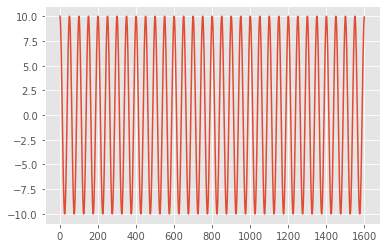

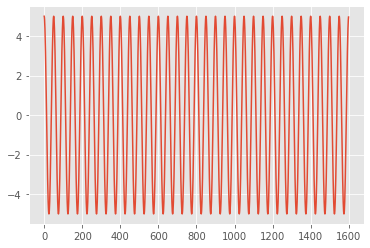

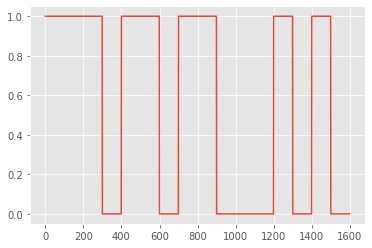

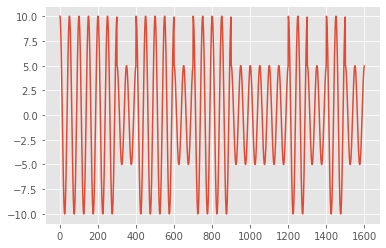

In [206]:
#Plot
fig = plt.plot(carrier1)
plt.show()

fig = plt.plot(carrier2)
plt.show()

fig = plt.plot(binary_signal)
plt.show()

fig = plt.plot(mod_signal)
plt.show()

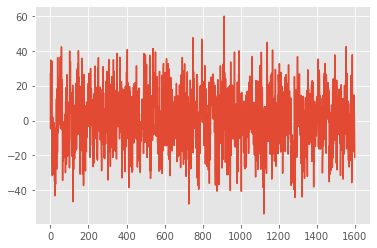

In [207]:
noise = 15*np.sqrt(N0/2)*np.random.randn(bitlen * nb)
sig_noisy= mod_signal + noise
fig = plt.plot(sig_noisy)
plt.show()

In [208]:
r = ASKdemod(mod_signal)
print(*ASKdemod(mod_signal))
print(*binary_seq)

1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0
1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0


In [209]:
r = ASKdemod(sig_noisy)
print(*r)
print(*binary_seq)


1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0
1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0


In [210]:
error = np.sum(np.abs(binary_seq - r)) / bitlen
print("%5.2f%%" % (error*100))

 6.25%
